# Amadeus Data Challenge

## Lorenzo von Ritter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

###Exercise 1: Count the number of lines

##### We just do it in the shell, so that we don't need to read the csv

######  wc -l searches.csv                 ->           20390198 searches.csv
##### wc -l bookings.csv                   ->           10000011 bookings.csv


### Execise 2: Top 10 airports

##### before importing bookings, remove whitespaces before the delimiter from the original file with 
##### sed 's/\s*^/^/g' bookings.csv > bookingsClean.csv

In [20]:
%%timeit
airports = []
for chunk in pd.read_csv("../Files/bookingsClean.csv", sep="^", usecols=['arr_port','pax'], dtype={'arr_port': object, 'pax': np.float64}, chunksize=500000):
    airports.append(chunk.groupby('arr_port').pax.count())
airports = pd.concat(airports, axis=1)
columns_list = list(airports)
airports['Arrivals'] = airports.sum(axis=1)
airports.drop(columns_list,axis=1,inplace=True)
airports.sort(columns='Arrivals',inplace=True, ascending=0)

1 loops, best of 3: 1min 6s per loop


In [21]:
airports.head(10)

,sum
LHR,215551
JFK,158930
CDG,149390
LAX,143220
DXB,135640
BKK,130420
MIA,117820
SFO,110970
MNL,109530
ORD,99750


### Exercise 3: Monthly arrivals in Málaga, Madrid and Barcelona

In [37]:
%%timeit
specialSearches = pd.DataFrame
specialSearchesList = []
datecount = pd.DataFrame
for chunk in pd.read_csv("../Files/searches.csv", sep="^", usecols=['Date','Time','Destination'], parse_dates=[['Date','Time']], dtype={'Destination': object}, chunksize=500000):
    specialSearches = chunk[(chunk["Destination"] == "AGP") | (chunk["Destination"] == "BCN") | (chunk["Destination"] == "MAD")]
    specialSearches = specialSearches.groupby(['Date_Time','Destination']).Date_Time.count()
    specialSearches = specialSearches.unstack('Destination')
    specialSearchesList.append(specialSearches)
datecount = pd.concat(specialSearchesList)

In [42]:
datecount.index = pd.to_datetime(datecount.index)
monthcount = datecount.resample('M', how=sum)
monthcount

Destination,AGP,BCN,MAD
2013-01-31,9633,29469,24258
2013-02-28,8379,28329,22800
2013-03-31,10659,30552,24681
2013-04-30,8265,31236,25251
2013-05-31,10830,28728,26334
2013-06-30,7923,26505,22800
2013-07-31,8892,29241,22971
2013-08-31,7866,27075,21831
2013-09-30,8151,23427,21147
2013-10-31,6499,20276,22294


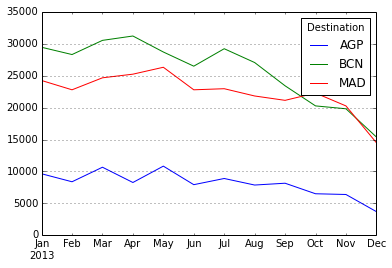

In [43]:
monthcount.plot()

### Exercise 4: Join DataFrames

In [3]:
emptySearches = pd.DataFrame({'Date_Time': [], 'Origin': [], 'Destination': [], 'Booked': []})
emptySearches.to_csv('../Files/bookedSearchesSmall.csv', sep='^', index=False, cols=['Date_Time','Origin','Destination','Booked'])

In [4]:
%%time
for search in pd.read_csv("../Files/searchesSmall.csv", sep="^", usecols=['Date','Time','Origin','Destination'], parse_dates=[['Date','Time']], dtype={'Origin': object, 'Destination': object}, chunksize=50000):
    search['Booked'] = 0 #add empty column for later
    for booking in pd.read_csv("../Files/bookingsCleanSmall.csv", sep="^", usecols=['dep_port','arr_port','pax'], dtype={'dep_port': object, 'arr_port': object, 'pax': np.float64}, chunksize=50000):
        for searchRowIndex, searchRow in search.iterrows():
            if np.any((booking['dep_port']==searchRow['Origin']) & (booking['arr_port']==searchRow['Destination']) & (booking['pax']>0)):
                search.set_value(searchRowIndex, 'Booked', 1) #if corresponding booking found, change 'Booked' value to 1
    with open('../Files/bookedSearchesTiny.csv', 'a') as file:
        search.to_csv('../Files/bookedSearchesSmall.csv', mode='a', sep='^', header=False, index=False)

CPU times: user 9min 13s, sys: 973 ms, total: 9min 14s
Wall time: 9min 15s


In [109]:
search

NameError: name 'search' is not defined

In [62]:
searches = pd.read_csv('../Files/searchesTiny.csv', sep='^', usecols=['Date','Time','Origin','Destination'], parse_dates=[['Date','Time']], dtype={'Origin': object, 'Destination': object})

In [63]:
searches

,Date_Time,Origin,Destination
0,2013-01-01 20:25:57,TXL,AUH
1,2013-01-01 10:15:33,ATH,MIL
2,2013-01-01 18:04:49,ICT,SFO
3,2013-01-01 17:42:40,RNB,ARN
4,2013-01-01 17:48:29,OSL,MAD
5,2013-01-01 22:00:28,IAH,BLR
6,2013-01-01 10:47:14,CPH,PAR
7,2013-01-01 23:39:49,PAR,DUB
8,2013-01-01 17:08:46,DUS,ACE
9,2013-01-01 19:57:57,FRA,BGW


In [64]:
searches['Booked'] = 0
searches

,Date_Time,Origin,Destination,Booked
0,2013-01-01 20:25:57,TXL,AUH,0
1,2013-01-01 10:15:33,ATH,MIL,0
2,2013-01-01 18:04:49,ICT,SFO,0
3,2013-01-01 17:42:40,RNB,ARN,0
4,2013-01-01 17:48:29,OSL,MAD,0
5,2013-01-01 22:00:28,IAH,BLR,0
6,2013-01-01 10:47:14,CPH,PAR,0
7,2013-01-01 23:39:49,PAR,DUB,0
8,2013-01-01 17:08:46,DUS,ACE,0
9,2013-01-01 19:57:57,FRA,BGW,0


In [65]:
bookings = pd.read_csv("../Files/bookingsCleanTiny.csv", sep="^", usecols=['dep_port','arr_port','pax'], dtype={'dep_port': object, 'arr_port': object, 'pax': np.float64})

In [66]:
bookings

,dep_port,arr_port,pax
0,ZRH,LHR,-1
1,SAL,CLT,1
2,SAL,CLT,1
3,AKL,SVO,1
4,AKL,SVO,1
5,DEN,LGA,1
6,DEN,LGA,1
7,NRT,SIN,2
8,NRT,SIN,2
9,NRT,SIN,2


In [80]:
array = []
for searchesRowIndex, searchesRow in searches.iterrows():
    array.append([searchesRowIndex, searchesRow['Origin'], searchesRow['Destination']])
    if np.any((bookings['dep_port']==searchesRow['Origin']) & (bookings['arr_port']==searchesRow['Destination']) & (bookings['pax']>0)):
        array.append([9999999999, 'found', 'one'])

In [81]:
array

[[0, 'TXL', 'AUH'],
 [1, 'ATH', 'MIL'],
 [2, 'ICT', 'SFO'],
 [3, 'RNB', 'ARN'],
 [4, 'OSL', 'MAD'],
 [5, 'IAH', 'BLR'],
 [6, 'CPH', 'PAR'],
 [7, 'PAR', 'DUB'],
 [8, 'DUS', 'ACE'],
 [9, 'FRA', 'BGW'],
 [10, 'PAR', 'BUD'],
 [11, 'RIO', 'POA'],
 [12, 'HKG', 'MXP'],
 [13, 'BCN', 'LON'],
 [14, 'CLE', 'SNN'],
 [15, 'BSB', 'SLZ'],
 [16, 'PEK', 'PHL'],
 [17, 'BOS', 'GRU'],
 [18, 'TBS', 'IKT'],
 [19, 'LON', 'HKG'],
 [20, 'MAD', 'SEA'],
 [21, 'DUS', 'STN'],
 [22, 'PAD', 'FUE'],
 [23, 'DUS', 'IST'],
 [24, 'BHX', 'VIE'],
 [25, 'CGB', 'SAO'],
 [26, 'ZRH', 'BRI'],
 [27, 'RUH', 'JED'],
 [28, 'UME', 'CPH'],
 [29, 'FRA', 'DRS'],
 [30, 'BER', 'DUS'],
 [31, 'WAW', 'VCE'],
 [32, 'MOW', 'NBC'],
 [33, 'FRA', 'USM'],
 [34, 'FRA', 'IAD'],
 [35, 'STO', 'BKK'],
 [36, 'LYS', 'SIN'],
 [37, 'HYD', 'LKO'],
 [38, 'CPH', 'BKK'],
 [9999999999, 'found', 'one'],
 [39, 'GRZ', 'MUC'],
 [40, 'DMM', 'MNL'],
 [41, 'MAA', 'BBI'],
 [42, 'CPH', 'MNL'],
 [43, 'BOS', 'RSW'],
 [44, 'PVG', 'CMH'],
 [45, 'EWR', 'PLS'],
 [46, 'STR', 

In [61]:
searches = pd.read_csv('../Files/searches.csv', sep='^', nrows=5000, usecols=['Date','Time','Origin','Destination'], parse_dates=[['Date','Time']], dtype={'Origin': object, 'Destination': object})

In [24]:
bookedSearches = pd.read_csv('../Files/bookedSearchesTiny.csv', sep='^', parse_dates=['Date_Time'], dtype={'Origin': object, 'Destination': object, 'Booked': np.float64})

In [33]:
searches[95:120]

,Date_Time,Origin,Destination
95,2013-01-01 18:39:14,PMO,VRN
96,2013-01-01 08:47:07,QYG,SFO
97,2013-01-01 21:07:29,MAH,PAR
98,2013-01-01 17:17:21,SFO,LGW
99,2013-01-01 15:08:37,LHR,LAX
100,2013-01-01 08:51:25,HRB,HEK
101,2013-01-01 16:16:57,FUK,HNL
102,2013-01-01 16:06:33,STN,KTW
103,2013-01-01 01:28:57,NYC,OAX
104,2013-01-01 01:30:54,MAA,ORD


In [34]:
bookedSearches[95:120]

,Date_Time,Origin,Destination,Booked
95,2013-01-01 18:39:14,PMO,VRN,0
96,2013-01-01 08:47:07,QYG,SFO,0
97,2013-01-01 21:07:29,MAH,PAR,0
98,2013-01-01 17:17:21,SFO,LGW,0
99,2013-01-01 15:08:37,LHR,LAX,0
100,2013-01-01 08:51:25,HRB,HEK,0
101,2013-01-01 16:16:57,FUK,HNL,0
102,2013-01-01 16:06:33,STN,KTW,0
103,2013-01-01 01:28:57,NYC,OAX,0
104,2013-01-01 01:30:54,MAA,ORD,0


In [60]:
searches[['Origin','Destination']][105:115].values == bookedSearches[['Origin','Destination']][105:115].values

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]], dtype=bool)

In [56]:
print array

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


In [45]:
bookedSearches[['Origin','Destination']].head(10)

,Origin,Destination
0,TXL,AUH
1,ATH,MIL
2,ICT,SFO
3,RNB,ARN
4,OSL,MAD
5,IAH,BLR
6,CPH,PAR
7,PAR,DUB
8,DUS,ACE
9,FRA,BGW


In [115]:
np.arange(4)

array([0, 1, 2, 3])

In [65]:
df2 = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})
df2

,x,y
0,1,4
1,2,5
2,3,6


In [116]:
df2['z'] = 0
df2

,x,y,z
0,1,4,0
1,2,5,0
2,3,6,0


In [113]:
df1 = pd.DataFrame({'x': [1, 5, 9], 'y': [4, 8, 11]})
df1

,x,y
0,1,4
1,2,5
2,3,6


In [62]:
series = []
for row_index, row in df2.iterrows():
    print [row['x'],row['y']].isin([1,3,5])
     

AttributeError: 'list' object has no attribute 'isin'

In [112]:
np.any((df2['x']==df[]) & (df2['y']==6))

True

##### only take bookings, no cancellations

In [20]:
positiveBookings = bookings[bookings['pax']>0]

In [49]:
bookedSearches = pd.merge(searches.head(100000), positiveBookings.head(100000), left_on=['Origin','Destination'], right_on=['dep_port','arr_port'], left_index=True)

In [55]:
bookedSearches['index'] = bookedSearches.index
bookedSearches.drop_duplicates(cols='index',inplace=True)

In [56]:
bookedSearches[['Date_Time','TxnCode','OfficeID','Country','Origin','Destination','RoundTrip','pax']].sort()

,Date_Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,pax
5,2013-02-02 19:43:12,FQD,e8741eaf2fa2f71f931475d18fa72096,US,DEN,LGA,0,1
6,2013-02-02 19:43:12,FQD,e8741eaf2fa2f71f931475d18fa72096,US,DEN,LGA,0,1
7,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,2
8,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,2
9,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,2
10,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,2
15,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,1
16,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,1
17,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,1
18,2013-02-04 22:36:52,FFP,7d668b5f750866f7a8f10f1505c9423f,JP,NRT,SIN,0,1


In [ ]:
#searches['booked'] = pd.Series(np.zeros((searchesSize,), dtype=numpy.int), index=searches.index)

In [ ]:
searches['booked'] = pd.Series(searches['TxnCode'] == bookedSearches['TxnCode'].any), index=searches.index)

In [ ]:
searches.to_csv('searcheswithbookings.csv', sep='^')